# Cluster analysis

In [3]:
import numpy as np
scholar_all = np.load('gs_scholars_all_upd.npy', allow_pickle=True)

In [4]:
import pandas as pd
df_scholar = pd.DataFrame.from_records(scholar_all)

In [5]:
import pickle
with open('years.pkl', 'rb') as y, open("cites.pkl", 'rb') as c:
  y = pickle.load(y)
  X = pickle.load(c)

In [20]:
for scholar in scholar_all:
  cites, years = scholar['cites']['cites'], scholar['cites']['years']
  new_cites, new_years = [], []
  for cite, year in zip(cites, years):
    cite, year = int(cite), int(year)
    if year >= 1950 and year < 2022:
      new_cites.append(cite)
      new_years.append(year)
  scholar['new_cites'], scholar['new_years'] = new_cites, new_years

In [21]:
X, y = [], []
for scholar in scholar_all:
  X.append(scholar['new_cites'])
  y.append(scholar['new_years'])


In [7]:
maxLength = max(len(x) for x in X)
print(maxLength)
processed_y = []
processed_x = []
for i in range(len(y)):
  interpolated_y = np.linspace(y[i][0], y[i][-1], maxLength)
  processed_y.append(interpolated_y)
  interpolated_x = []
  for each in interpolated_y:
    interpolated_x.append(np.interp(each, y[i], X[i]))
  processed_x.append(interpolated_x)

40


In [8]:
processed_x = [each/np.mean(each) for each in processed_x]

In [ ]:
processed_x

In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.2 MB/s 


In [ ]:
import tslearn
from tslearn.clustering import TimeSeriesKMeans

In [ ]:
input = tslearn.utils.to_time_series_dataset(processed_x)
model = TimeSeriesKMeans(n_clusters=9, metric='dtw',max_iter=20,random_state=8)
model.fit(input)
model.labels_

array([6, 1, 3, ..., 0, 3, 3])

In [ ]:
import pickle
with open('model_label.pkl', 'wb') as f:
  pickle.dump(model.labels_, f)

In [6]:
import pickle
with open('model_label.pkl', 'rb') as f:
  model_labels = pickle.load(f)

In [7]:
model_labels

array([6, 1, 3, ..., 0, 3, 3])

## 9 clusters

In [ ]:
y = list(range(0,40,1))
len(y)

40

In [ ]:
import matplotlib.pyplot as plt
cluster = []
# new_x = []
for i in range(len(processed_x)):
  if (model.labels_[i] == 0):
    cluster.append(processed_x[i])
print(np.max(cluster))
print(len(cluster))
cluster = cluster / np.max(cluster)
# temp

7.236580516898608
6456


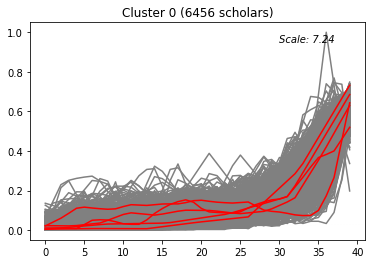

In [ ]:
import matplotlib.pyplot as plt
# Creating figure
fig = plt.figure()
 
# Adding axes on the figure
ax = fig.add_subplot(111)
 
# Plotting data on the axes
# ax.plot(x, y)
idx = [53, 73, 27, 23, 45]
# idx = [1,2,3,4,0]
for i in range(len(cluster)):

  if i not in idx:
    ax.plot(y, cluster[i], color='gray')
for i in idx:
  ax.plot(y, cluster[i], color='red')
# for i in temp:
#   plt.plot(y, processed_x[i], color='red')
# # plt.ylim([0,20])
ax.set_title("Cluster 0 (6456 scholars)")
ax.text(30, 0.95, 'Scale: 7.24', style='italic')
plt.show()
fig.savefig('cluster0.pdf')

## manually select 4 clusters

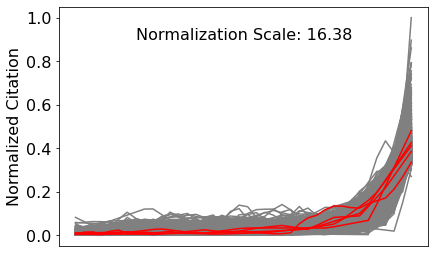

In [141]:
# which, title, scale = 0, 1, 7.24
# which, title, scale = 3, 3, 2.93
# which, title, scale = 6, 2, 3.97
# which, title, scale = 4, 4, 9.55

which, scale = 2, 16.38
# which, scale = 8, 3.73
# which, scale = 1, 3.68
# which, scale = 4, 9.55
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.labelleft'] = True

import matplotlib.pyplot as plt
cluster = []
# new_x = []
for i in range(len(processed_x)):
  if (model_labels[i] == which):
    cluster.append(processed_x[i])
# print(np.max(cluster))
# print(len(cluster))
# print(cluster[0])
cluster = cluster / np.max(cluster)
# Creating figure
fig = plt.figure()
y = np.arange(40)
# Adding axes on the figure
ax = fig.add_subplot(111)
 
# Plotting data on the axes
# ax.plot(x, y)
# 2 18/19 22 23 24 30 33! 34! 35! 37! 43 46
idx = [489, 598, 683, 1339, 970]
# idx = [970]
# idx = [5]
for i in range(len(cluster)):

  # if i not in idx:
    ax.plot(y, cluster[i], color='gray')
    if max(cluster[i]) < 0.19:
      print(i)
for i in idx:
  ax.plot(y, cluster[i], color='red')
# for i in temp:
#   plt.plot(y, processed_x[i], color='red')
# ax.plot(y, popt[0] * np.exp(popt[1] * np.array(y)) + popt[2], color='blue')
# ax.set_title(f"Type {title}")
ax.text(7, 0.9, f'Normalization Scale: {scale}', fontsize=16)
# ax.set_ylim([0, 1])
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.set_ylabel('Normalized Citation', fontsize=16)
# ax.set_xlabel('Years Since First Publication', fontsize=16)
# plt.subplots_adjust(left=0.02)
plt.subplots_adjust(top=0.98)
plt.subplots_adjust(right=0.98)
# plt.subplots_adjust(bottom=0.02)
# ax.set_aspect(aspect=1)
plt.subplots_adjust(bottom=0.15)
plt.show()
fig.savefig(f'cluster/cluster{which}_retitle_type.pdf')

### statistics in each cluster

In [ ]:
import json
import pickle

In [ ]:
with open('model_label.pkl', 'rb') as y:
  model = pickle.load(y)

In [ ]:
len(model)

68128

In [ ]:
cluster2 = []
for i in range(len(model)):
  if model[i] == 4:
    cluster2.append(ids[i]["url"].split("&user=")[-1])

In [ ]:
scholar_2 = [scholar for scholar in scholars if scholar["gs_sid"] in cluster2]

In [ ]:
print(len(scholar_2))

1565


In [ ]:
import numpy as np
female = 0
male = 0
dropout = 0
citation = []
h_index = []
academic_age = []
for each in scholar_2:
  # if each["gender"] == 'F':
  #   female += 1

    citation.append(int(each["citation_table"][0]))
    h_index.append(int(each["citation_table"][1]))
    academic_age.append(each["academic_age"])
    if each["academic_age"] - each["academic_lifespan"] > 2:
      dropout += 1
# print(female/(female + male))
# print(female/len(scholar_2))
print(np.mean(citation))
print(np.mean(h_index))
print(np.mean(academic_age))
print(dropout/len(scholar_2))
# print(dropout / female)

787.8006389776358
9.858785942492013
22.16996805111821
0.5987220447284345


In [ ]:
# Dropout rate of female and non-female in each cluster
female_count = 0
total_count = 0
female_citation = 0
total_citation = 0
male_citation = 0
male_count = 0
dropout = 0
female_dropout = 0
male_dropout = 0
for i in range(len(processed_x)):
  if model.labels_[i] == 3 or model.labels_[i] == 5 or model.labels_[i] == 8:
    # total_citation += int(scholars[i]['citation_table'][0])
    total_count += 1
    if scholars[i]["academic_age"] - scholars[i]["academic_lifespan"] > 2:
      dropout += 1
    if scholars[i]["gender"] == 'F':
      # female_citation += int(scholars[i]['citation_table'][0])
      female_count += 1
      if scholars[i]["academic_age"] - scholars[i]["academic_lifespan"] > 2:
        female_dropout += 1
    elif scholars[i]["gender"] == 'M':
      # male_citation += int(scholars[i]['citation_table'][0])
      male_count += 1
      if scholars[i]["academic_age"] - scholars[i]["academic_lifespan"] > 2:
        male_dropout += 1
print(female_dropout / female_count)
print(dropout / total_count)
print((female_dropout / female_count) / ((female_dropout + male_dropout) / (female_count + male_count)))

0.0989556135770235
0.08830159719890643
1.063329683299997


In [ ]:
# Average citation of female and non-female in each cluster
female_count = 0
total_count = 0
female_citation = 0
total_citation = 0
male_citation = 0
male_count = 0
for i in range(len(processed_x)):
  if model.labels_[i] == 4:
    total_citation += int(scholars[i]['citation_table'][0])
    total_count += 1
    if scholars[i]["gender"] == 'F':
      female_citation += int(scholars[i]['citation_table'][0])
      female_count += 1
    elif scholars[i]["gender"] == 'M':
      male_citation += int(scholars[i]['citation_table'][0])
      male_count += 1
print(total_citation / total_count)
print(female_citation / female_count)
print((female_citation / female_count) / ((female_citation + male_citation) / (female_count + male_count)))

787.8006389776358
438.14503816793894
0.5708214974721154


In [ ]:
# Average academic_age of female and non-female in each cluster
female_count = 0
total_count = 0
female_index = 0
total_index = 0
male_index = 0
male_count = 0
for i in range(len(processed_x)):
  if model.labels_[i] == 4:
    total_index += int(scholars[i]['academic_age'])
    total_count += 1
    if scholars[i]["gender"] == 'F':
      female_index += int(scholars[i]['academic_age'])
      female_count += 1
    elif scholars[i]["gender"] == 'M':
      male_index += int(scholars[i]['academic_age'])
      male_count += 1
print(female_index / female_count)
print(total_index / total_count)
print((female_index / female_count) / ((female_index + male_index) / (female_count + male_count)))

19.923664122137403
21.945047923322683
0.8778880472385755


## fit one curve for the whole cluster

In [12]:
import json
with open("new_cluster_data.jsonl") as f:
  scholars = [json.loads(line) for line in f if line.strip()]
  # scholars = scholars[0:10000]
  print(scholars[1])

{'gs_sid': '9gVmuMAAAAAJ', 'organization': 'Software Engineering Manager, Apple Inc.', 'organization_code': '11540454294127154050', 'academic': False, 'gender': '-', 'academic_lifespan': 24, 'academic_age': 27, 'cit_sum_before_year': {'1996': 10, '1997': 58, '1998': 203, '1999': 324, '2000': 461, '2001': 555, '2002': 686, '2003': 791, '2004': 870, '2005': 960, '2006': 1043, '2007': 1162, '2008': 1274, '2009': 1383, '2010': 1537, '2011': 1688, '2012': 1815, '2013': 1986, '2014': 2169, '2015': 2356, '2016': 2558, '2017': 2740, '2018': 2927, '2019': 3115, '2020': 3293, '2021': 3434, '2022': 3456}, 'citation_table': ['3502', '30'], 'domain_labels': ['natural_language_processing', 'data_management', 'information_retrieval'], 'paper_num': 118}


In [15]:
# len(scholar_all), len(scholars), len(X), len(y)
X[1000], scholars[1000]

([3, 13, 49, 265, 486],
 {'academic': True,
  'academic_age': 8,
  'academic_lifespan': 8,
  'cit_sum_before_year': {'2017': 3,
   '2018': 16,
   '2019': 65,
   '2020': 330,
   '2021': 816,
   '2022': 943},
  'citation_table': ['835', '14'],
  'domain_labels': ['machine_learning',
   'neural_networks',
   'information_retrieval',
   'natural_language_processing'],
  'gender': 'M',
  'gs_sid': '7wWfoDgAAAAJ',
  'organization': 'University of Glasgow',
  'organization_code': '18074491010562968867',
  'paper_num': 50})

In [76]:
cnt = 0
cluster0_url = []
cluster2_url = []
cluster3_url = []
cluster5_url = []
cluster8_url = []
cluster1_url = []
cluster6_url = []
cluster7_url = []
for label in model_labels:
  scholars[cnt]['cite'] = (y[cnt], X[cnt])
  if label == 0:
    cluster0_url.append(scholars[cnt])
  elif label == 2:
    cluster2_url.append(scholars[cnt])
  elif label == 3:
    cluster3_url.append(scholars[cnt])
  elif label == 5:
    cluster5_url.append(scholars[cnt])
  elif label == 8:
    cluster8_url.append(scholars[cnt])
  elif label == 1:
    cluster8_url.append(scholars[cnt])
  elif label == 6:
    cluster8_url.append(scholars[cnt])
  elif label == 7:
    cluster8_url.append(scholars[cnt])
  cnt += 1

In [28]:
from scipy.optimize import curve_fit
def exp_func(x, a, b):
  return a * np.exp(b * x)
def linear_func(x, a, b):
  return a * x + b
def quad_func(x, a, b, c):
  return a * x * x + b * x + c

In [36]:
import matplotlib.pyplot as plt
cluster = []
for i in range(len(processed_x)):
  if (model_labels[i] == 0):
    cluster.append(np.array(processed_x[i]))
cluster = np.array(cluster)
print(np.max(cluster))
print(len(cluster))
print(cluster.shape)
# cluster = cluster / np.max(cluster)

7.236580516898608
6456
(6456, 40)


In [54]:
def sample_fit(cluster, which, seed, all=True, num_samples=None, print=True):
    np.random.seed(seed)
    num_dpoints = len(cluster)
    if all:
      sample_list = np.arange(num_dpoints)
      num_samples = num_dpoints
    else:
      sample_list = np.random.choice(num_dpoints, num_samples, replace=False)
    ydata = np.array([])
    for idx in sample_list:
        ydata = np.concatenate((ydata, cluster[idx]), axis=0)
    # print(ydata.shape, np.tile(np.arange(cluster.shape[1]), num_samples).shape)
    # normal fitting: p0=[1e-3, 1e-1, 1e-2] for cluster 0, p0=[5e-5, 2e-1, 1e-2] for cluster 2
    # exponential analysis:
    # cluster 0 100 males: p0=[2e-2, 1e-1, -2e-2]
    # cluster 0 100 females: p0=[0.02279108  0.09409169 -0.02334194]
    # cluster 2 100 males: p0=[0.00329749 0.13766419 0.00772124]
    if which == 0 or which == 2:
      popt, pcov = curve_fit(exp_func, np.tile(np.arange(cluster.shape[1]), num_samples), ydata, p0=[0.1, 0.1]) 
    elif which == 3 or which == 5 or which == 8:
      popt, pcov = curve_fit(linear_func, np.tile(np.arange(cluster.shape[1]), num_samples), ydata, p0=[0.1, 0.1]) 
    else:
      popt, pcov = curve_fit(quad_func, np.tile(np.arange(cluster.shape[1]), num_samples), ydata, p0=[0.1, 1, 0]) 
    if print:
      print(popt)
    return popt, pcov
# print(len(cluster))
# popt, pcov = sample_fit(cluster, 0, all=True)
# print(cluster.shape)
# popt, pcov = sample_fit(cluster, 0, 0, all=True)

In [83]:
for which in [0, 2, 3, 5, 8, 1, 6, 7]:
  cluster = []
  for i in range(len(processed_x)):
    if (model_labels[i] == which):
      cluster.append(np.array(processed_x[i]))
  cluster = np.array(cluster)
  sample_fit(cluster, which, 0, all=True)

[0.05171501 0.11270211]
[0.00264075 0.19990668]
[0.04147512 0.19123525]
[ 0.06909297 -0.34731291]
[ 0.05702033 -0.11189637]
[-0.00137552  0.08143984  0.11825496]
[-0.00223986  0.1020333   0.16051916]
[-0.00045872  0.06892127 -0.10841072]


count by gender

In [119]:
for which in [0, 2, 3, 5, 8, 1, 6, 7, 4]:
  f, m = 0, 0
  for i in range(len(processed_x)):
    if (model_labels[i] == which):
      if scholars[i]['gender'] == 'F':
        f += 1
      elif scholars[i]['gender'] == 'M':
        m += 1
  print(f'Cluster {which}: female count {f}, male count {m}, ratio {f/(f+m)}')

Cluster 0: female count 575, male count 2455, ratio 0.18976897689768976
Cluster 2: female count 143, male count 573, ratio 0.19972067039106145
Cluster 3: female count 1123, male count 4877, ratio 0.18716666666666668
Cluster 5: female count 1223, male count 5103, ratio 0.1933291179260196
Cluster 8: female count 1484, male count 6585, ratio 0.18391374395835916
Cluster 1: female count 667, male count 3202, ratio 0.17239596795037476
Cluster 6: female count 537, male count 2734, ratio 0.16416997859981658
Cluster 7: female count 330, male count 1704, ratio 0.16224188790560473
Cluster 4: female count 131, male count 728, ratio 0.15250291036088476


check their academic age description

In [9]:
pd.set_option('display.max_columns', 100)
df_scholar.head(1)

,academic,academic_age,academic_lifespan,cit_sum_before_year,citation_table,domain_labels,gender,gs_sid,organization,organization_code,paper_num,cites,co_authors,name,papers,url,top_num_coauthors,num_domain,top_topic_diversity,co_authors_all,num_coauthors_all_wwo_ai,organization_top
0,False,31.0,28.0,"{'1994': 39, '1995': 86, '1996': 187, '1997': ...","[3539, 27]","[logic_programming, machine_learning, natural_...",F,IIrX5SMAAAAJ,N/A,None,151,"{'years': ['1994', '1995', '1996', '1997', '19...",None,Theresa Swift,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,NaN,3.0,NaN,"{XMxznHQAAAAJ, tdeoCWkAAAAJ, DeFaEH8AAAAJ, ptn...",84,0.0


In [13]:
# scholar_all, df_scholar
# for which in [0, 2, 3, 5, 8, 1, 6, 7, 4]:
#   f, m = [], []
#   for i in range(len(processed_x)):
#     if (model_labels[i] == which):
#       if scholars[i]['gender'] == 'F':
#         f.append(df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid'], 'academic_age'].item())
#       elif scholars[i]['gender'] == 'M':
#         m.append(df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid'], 'academic_age'].item())
#   print(pd.DataFrame(f, columns=['F']).describe(), pd.DataFrame(m, columns=['M']).describe())
# 1 exponential, 2 stumbling, 3 linear, 4 struggling
for which in [1,2,3,4]:
  f, m = [], []
  for i in range(len(processed_x)):
    if ((which == 1 and (model_labels[i] == 0 or model_labels[i] == 2)) 
      or (which == 2 and (model_labels[i] == 3 or model_labels[i] == 5 or model_labels[i] == 8)) 
      or (which == 3 and (model_labels[i] == 1 or model_labels[i] == 6 or model_labels[i] == 7))
      or (which == 4 and model_labels[i] == 4)):
      if scholars[i]['gender'] == 'F':
        f.append(df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid'], 'academic_age'].item())
      elif scholars[i]['gender'] == 'M':
        m.append(df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid'], 'academic_age'].item())
  print(pd.DataFrame(f, columns=['F']).describe(), pd.DataFrame(m, columns=['M']).describe())

                F
count  718.000000
mean    16.980501
std      9.120587
min      5.000000
25%     11.000000
50%     15.000000
75%     20.000000
max     68.000000                  M
count  3028.000000
mean     18.746697
std      11.499023
min       3.000000
25%      11.000000
50%      16.000000
75%      22.000000
max      73.000000
                 F
count  3830.000000
mean     14.744648
std       9.799029
min       3.000000
25%       8.000000
50%      12.000000
75%      18.000000
max      72.000000                   M
count  16565.000000
mean      15.719589
std       10.775812
min        2.000000
25%        8.000000
50%       13.000000
75%       19.000000
max       73.000000
                 F
count  1534.000000
mean     18.400261
std       9.240508
min       2.000000
25%      12.000000
50%      16.000000
75%      22.000000
max      73.000000                  M
count  7640.000000
mean     20.655366
std      10.987775
min       2.000000
25%      13.000000
50%      18.000000
75%      25.

In [14]:
# citations describe
# scholar_all, df_scholar
import json
for which in [1,2,3,4]:
  f, m = [], []
  for i in range(len(processed_x)):
    if ((which == 1 and (model_labels[i] == 0 or model_labels[i] == 2)) 
      or (which == 2 and (model_labels[i] == 3 or model_labels[i] == 5 or model_labels[i] == 8)) 
      or (which == 3 and (model_labels[i] == 1 or model_labels[i] == 6 or model_labels[i] == 7))
      or (which == 4 and model_labels[i] == 4)):
      if scholars[i]['gender'] == 'F':
        f.append(int(df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid'], 'citation_table'].item()[0]))
      elif scholars[i]['gender'] == 'M':
        m.append(int(df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid'], 'citation_table'].item()[0]))
  print(pd.DataFrame(f, columns=[f'{which} F']).describe(), pd.DataFrame(m, columns=[f'{which} M']).describe())

                1 F
count    718.000000
mean    1569.488858
std     3826.324690
min      100.000000
25%      248.750000
50%      498.500000
75%     1391.500000
max    46839.000000                  1 M
count    3028.000000
mean     3397.505945
std     15659.712193
min        92.000000
25%       296.750000
50%       675.500000
75%      2111.500000
max    533757.000000
                 2 F
count    3830.000000
mean     1897.354308
std      5545.046272
min        17.000000
25%       204.000000
50%       429.000000
75%      1331.750000
max    118508.000000                  2 M
count   16565.000000
mean     2938.587564
std     11549.918115
min        39.000000
25%       241.000000
50%       550.000000
75%      1882.000000
max    484399.000000
                 3 F
count    1534.000000
mean     1895.126467
std      9232.580375
min        30.000000
25%       187.000000
50%       389.500000
75%      1050.750000
max    209549.000000                  3 M
count    7640.000000
mean     2660.710733
s

In [15]:
# citations describe
# scholar_all, df_scholar
import json
quantile_arr = [0.5, 0.6, 0.7, 0.8, 0.9, 0.92, 0.95, 0.98, 1.0]
interp = 'nearest'
for which in [1,2,3,4]:
  f, m = [], []
  for i in range(len(processed_x)):
    if ((which == 1 and (model_labels[i] == 0 or model_labels[i] == 2)) 
      or (which == 2 and (model_labels[i] == 3 or model_labels[i] == 5 or model_labels[i] == 8)) 
      or (which == 3 and (model_labels[i] == 1 or model_labels[i] == 6 or model_labels[i] == 7))
      or (which == 4 and model_labels[i] == 4)):
      if scholars[i]['gender'] == 'F':
        f.append(int(df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid'], 'citation_table'].item()[0]))
      elif scholars[i]['gender'] == 'M':
        m.append(int(df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid'], 'citation_table'].item()[0]))
  print(pd.DataFrame(f, columns=[f'{which} F']).quantile(q=quantile_arr, interpolation=interp), pd.DataFrame(m, columns=[f'{which} M']).quantile(q=quantile_arr, interpolation=interp))

        1 F
0.50    498
0.60    683
0.70    997
0.80   1738
0.90   3277
0.92   3772
0.95   6086
0.98  10088
1.00  46839          1 M
0.50     676
0.60     969
0.70    1721
0.80    2834
0.90    6394
0.92    7781
0.95   11817
0.98   23087
1.00  533757
         2 F
0.50     429
0.60     622
0.70     919
0.80    1807
0.90    3740
0.92    5356
0.95    8267
0.98   17263
1.00  118508          2 M
0.50     550
0.60     796
0.70    1467
0.80    2485
0.90    5945
0.92    7382
0.95   11333
0.98   23175
1.00  484399
         3 F
0.50     388
0.60     571
0.70     816
0.80    1479
0.90    3019
0.92    3735
0.95    6094
0.98   13164
1.00  209549          3 M
0.50     542
0.60     777
0.70    1349
0.80    2277
0.90    5297
0.92    6555
0.95    9812
0.98   20809
1.00  234352
       4 F
0.50   269
0.60   325
0.70   371
0.80   547
0.90   761
0.92   865
0.95   992
0.98  1601
1.00  5653         4 M
0.50    293
0.60    376
0.70    542
0.80    819
0.90   1622
0.92   2117
0.95   2763
0.98   5358
1.00  42831


## which cluster are NLP scholars mostly at?

In [16]:
nlp = ['natural_language_processing',
 'computational_linguistics',
 'nlp',
 'text_analytics',
 'text_analysis',
 'natural_language',
 'language_technology',
 'natural_language_understanding',
 'language_modeling',
 'document_analysis']

In [20]:
for which in [1,2,3,4]:
  f_nlp, m_nlp = 0, 0
  f_tot, m_tot = 0, 0
  for i in range(len(processed_x)):
    if ((which == 1 and (model_labels[i] == 0 or model_labels[i] == 2)) 
      or (which == 2 and (model_labels[i] == 3 or model_labels[i] == 5 or model_labels[i] == 8)) 
      or (which == 3 and (model_labels[i] == 1 or model_labels[i] == 6 or model_labels[i] == 7))
      or (which == 4 and model_labels[i] == 4)):
      if scholars[i]['gender'] == 'F':
        domains = df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid'], 'domain_labels'].item()
        for domain in domains:
          if domain in nlp:
            f_nlp += 1
            break
        f_tot += 1
      elif scholars[i]['gender'] == 'M':
        domains = df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid'], 'domain_labels'].item()
        for domain in domains:
          if domain in nlp:
            m_nlp += 1
            break
        m_tot += 1
  print(f'Cluster {which}: f_nlp {f_nlp}, m_nlp {m_nlp}, f_tot {f_tot}, m_tot {m_tot}, f_nlp_ratio {f_nlp/f_tot}, m_nlp_ratio {m_nlp/m_tot}, f_in_nlp {f_nlp/(f_nlp+m_nlp)}')

Cluster 1: f_nlp 137, m_nlp 332, f_tot 718, m_tot 3028, f_nlp_ratio 0.19080779944289694, m_nlp_ratio 0.1096433289299868, f_in_nlp 0.2921108742004264
Cluster 2: f_nlp 678, m_nlp 2039, f_tot 3830, m_tot 16565, f_nlp_ratio 0.17702349869451697, m_nlp_ratio 0.12309085421068518, f_in_nlp 0.24953993375046007
Cluster 3: f_nlp 311, m_nlp 1041, f_tot 1534, m_tot 7640, f_nlp_ratio 0.20273794002607562, m_nlp_ratio 0.1362565445026178, f_in_nlp 0.23002958579881658
Cluster 4: f_nlp 32, m_nlp 79, f_tot 131, m_tot 728, f_nlp_ratio 0.24427480916030533, m_nlp_ratio 0.10851648351648352, f_in_nlp 0.2882882882882883


In [18]:
for which in [1,2,3,4]:
  f_nlp, m_nlp = [], []
  f_tot, m_tot = [], []
  for i in range(len(processed_x)):
    if ((which == 1 and (model_labels[i] == 0 or model_labels[i] == 2)) 
      or (which == 2 and (model_labels[i] == 3 or model_labels[i] == 5 or model_labels[i] == 8)) 
      or (which == 3 and (model_labels[i] == 1 or model_labels[i] == 6 or model_labels[i] == 7))
      or (which == 4 and model_labels[i] == 4)):
      row = df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid']]
      if scholars[i]['gender'] == 'F':
        domains = row['domain_labels'].item()
        for domain in domains:
          if domain in nlp:
            f_nlp.append(row['academic_age'].item())
            break
        f_tot.append(row['academic_age'].item())
      elif scholars[i]['gender'] == 'M':
        domains = row['domain_labels'].item()
        for domain in domains:
          if domain in nlp:
            m_nlp.append(row['academic_age'].item())
            break
        m_tot.append(row['academic_age'].item())
  print(pd.DataFrame(f_nlp, columns=['F nlp academic age']).describe(),
     pd.DataFrame(m_nlp, columns=['M nlp academic age']).describe(),
     pd.DataFrame(f_tot, columns=['F academic age']).describe(),
     pd.DataFrame(m_tot, columns=['M academic age']).describe(),
    )

       F nlp academic age
count          137.000000
mean            17.496350
std              9.578717
min              5.000000
25%             11.000000
50%             15.000000
75%             21.000000
max             52.000000        M nlp academic age
count          332.000000
mean            18.756024
std             10.876294
min              5.000000
25%             12.000000
50%             16.000000
75%             22.000000
max             71.000000        F academic age
count      718.000000
mean        16.980501
std          9.120587
min          5.000000
25%         11.000000
50%         15.000000
75%         20.000000
max         68.000000        M academic age
count     3028.000000
mean        18.746697
std         11.499023
min          3.000000
25%         11.000000
50%         16.000000
75%         22.000000
max         73.000000
       F nlp academic age
count          678.000000
mean            16.044248
std             10.555521
min              3.000000
25%   

NLP citations

In [19]:
for which in [1,2,3,4]:
  f_nlp, m_nlp = [], []
  f_tot, m_tot = [], []
  for i in range(len(processed_x)):
    if ((which == 1 and (model_labels[i] == 0 or model_labels[i] == 2)) 
      or (which == 2 and (model_labels[i] == 3 or model_labels[i] == 5 or model_labels[i] == 8)) 
      or (which == 3 and (model_labels[i] == 1 or model_labels[i] == 6 or model_labels[i] == 7))
      or (which == 4 and model_labels[i] == 4)):
      row = df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid']]
      if scholars[i]['gender'] == 'F':
        domains = row['domain_labels'].item()
        for domain in domains:
          if domain in nlp:
            f_nlp.append(int(row['citation_table'].item()[0]))
            # f.append(int(df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid'], 'citation_table'].item()[0]))
            break
        f_tot.append(int(row['citation_table'].item()[0]))
      elif scholars[i]['gender'] == 'M':
        domains = row['domain_labels'].item()
        for domain in domains:
          if domain in nlp:
            # print(type(row['citation_table'].item()))
            m_nlp.append(int(row['citation_table'].item()[0]))
            break
        m_tot.append(int(row['citation_table'].item()[0]))
  print(pd.DataFrame(f_nlp, columns=['F nlp citation']).describe(),
     pd.DataFrame(m_nlp, columns=['M nlp citation']).describe(),
     pd.DataFrame(f_tot, columns=['F citation']).describe(),
     pd.DataFrame(m_tot, columns=['M citation']).describe(),
    )

       F nlp citation
count      137.000000
mean      1884.153285
std       4770.797690
min        106.000000
25%        240.000000
50%        571.000000
75%       1508.000000
max      46839.000000        M nlp citation
count      332.000000
mean      2412.617470
std       4050.980673
min        105.000000
25%        295.000000
50%        698.500000
75%       2494.250000
max      27605.000000          F citation
count    718.000000
mean    1569.488858
std     3826.324690
min      100.000000
25%      248.750000
50%      498.500000
75%     1391.500000
max    46839.000000           M citation
count    3028.000000
mean     3397.505945
std     15659.712193
min        92.000000
25%       296.750000
50%       675.500000
75%      2111.500000
max    533757.000000
       F nlp citation
count      678.000000
mean      2001.817109
std       3866.889044
min         95.000000
25%        234.250000
50%        567.500000
75%       2040.500000
max      35864.000000        M nlp citation
count     2039.

correlation of academic age and cluster

In [69]:
aca_age_list = []
for i in range(len(processed_x)):
 aca_age_list.append(df_scholar.loc[df_scholar['gs_sid'] == scholars[i]['gs_sid'], 'academic_age'])

In [72]:
aca_age_list = [item.item() for item in aca_age_list]

In [73]:
aca_age_list[0]

31.0

In [74]:
import numpy as np
from scipy.stats.stats import pearsonr
# np.corrcoef(aca_age_list, model_labels)
pearsonr(aca_age_list, model_labels)

(-0.03882998411191342, 3.716974683118032e-24)

## fit one curve for the whole cluster by gender

In [29]:
popt_list = []
for which in [0, 2, 3, 5, 8, 1, 6, 7]:
  cluster_f, cluster_m = [], []
  for i in range(len(processed_x)):
    if (model_labels[i] == which):
      if scholars[i]['gender'] == 'F':
        cluster_f.append(np.array(processed_x[i]))
      elif scholars[i]['gender'] == 'M':
        cluster_m.append(np.array(processed_x[i]))
  cluster_f, cluster_m = np.array(cluster_f), np.array(cluster_m)
  # print(f'female: {sample_fit(cluster_f, 0, 0, all=True)}')
  # print(f'male: {sample_fit(cluster_m, 0, 0, all=True)}')
  popt_list.append(sample_fit(cluster_f, which, 0, all=True)[0]) # female
  popt_list.append(sample_fit(cluster_m, which, 0, all=True)[0]) # male

[0.05115645 0.1129871 ]
[0.05210667 0.11240865]
[0.00188518 0.20898817]
[0.00275897 0.19859125]
[0.04151363 0.1904843 ]
[0.04165887 0.18765209]
[ 0.06867465 -0.33915562]
[ 0.06899396 -0.3453822 ]
[ 0.05700285 -0.1115555 ]
[ 0.05696354 -0.11078896]
[-0.00139031  0.08130756  0.12842588]
[-0.00137275  0.08128686  0.11981491]
[-0.0021802   0.09920758  0.18498248]
[-0.00226738  0.1036275   0.14356124]
[-0.00047138  0.06939446 -0.11114051]
[-0.00047399  0.06921529 -0.10630245]


## fit one curve for the whole curve by gender top 100

In [39]:
popt_list = []
for which in [0, 2, 3, 5, 8, 1, 6, 7]:
  cluster_f, cluster_m = [], []
  for i in range(len(processed_x)):
    if (model_labels[i] == which):
      if scholars[i]['gender'] == 'F':
        cluster_f.append((np.array(processed_x[i]), i))
      elif scholars[i]['gender'] == 'M':
        cluster_m.append((np.array(processed_x[i]), i))

  cites_f = np.array([scholars[index]['citation_table'][0] for index in [item[1] for item in cluster_f]])
  sorted_idx_f = cites_f.argsort()[::-1]
  cites_m = np.array([scholars[index]['citation_table'][0] for index in [item[1] for item in cluster_m]])
  sorted_idx_m = cites_m.argsort()[::-1]

  cluster_f, cluster_m = np.array([item[0] for item in cluster_f]), np.array([item[0] for item in cluster_m])
  cluster_f, cluster_m = np.array(cluster_f), np.array(cluster_m)
  cluster_f, cluster_m = cluster_f[sorted_idx_f[:100]], cluster_m[sorted_idx_m[:100]]
  # print(f'female: {sample_fit(cluster_f, 0, 0, all=True)}')
  # print(f'male: {sample_fit(cluster_m, 0, 0, all=True)}')
  # print(cluster_f.shape, cluster_m.shape)
  popt_list.append(sample_fit(cluster_f, which, 0, all=True)[0]) # female
  popt_list.append(sample_fit(cluster_m, which, 0, all=True)[0]) # male

[0.05044247 0.11371156]
[0.04925495 0.11418573]
[0.0026948 0.1992647]
[0.00259232 0.20056152]
[0.04193877 0.18219395]
[0.04434098 0.13535086]
[ 0.06966083 -0.35838625]
[ 0.0681749  -0.32941056]
[ 0.05731626 -0.11766715]
[ 0.05832467 -0.13733103]
[-0.00155824  0.08912416  0.06223335]
[-0.00152488  0.08852438  0.05680113]
[-0.00228569  0.10550378  0.11637828]
[-0.00238154  0.10865188  0.10420979]
[-0.00056876  0.07245148 -0.12074542]
[-0.00040506  0.06830462 -0.12394159]


There are not much difference

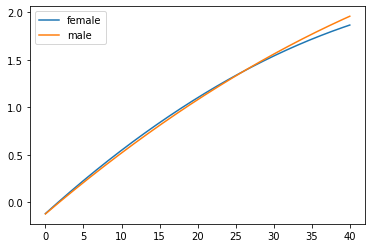

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 40, 10000)
i1, i2 = 14,15 # change this two value
# y1 = popt_list[i1][0] * np.exp(x * popt_list[i1][1]) # 0,1; 2,3; 
# y2 = popt_list[i2][0] * np.exp(x * popt_list[i2][1])
# y1 = popt_list[i1][0] * x + popt_list[i1][1] # 4,5; 6,7; 8,9
# y2 = popt_list[i2][0] * x + popt_list[i2][1]
y1 = popt_list[i1][0] * x * x + popt_list[i1][1] * x + popt_list[i1][2] # 10,11; 12,13; 14,15
y2 = popt_list[i2][0] * x * x + popt_list[i2][1] * x + popt_list[i2][2]
plt.plot(x, y1, label='female')
plt.plot(x, y2, label='male')
# plt.plot(x, y2_male, label='y2_male')
# plt.plot(x, y2_female, label='y2_female')
plt.legend()
plt.show()

freedom plot

## fit one curve for each scholar

In [57]:
popt_list = []
for which in [0, 2, 3, 5, 8, 1, 6, 7]:
  cluster_f, cluster_m = [], []
  for i in range(len(processed_x)):
    if (model_labels[i] == which):
      if scholars[i]['gender'] == 'F':
        cluster_f.append(np.array(processed_x[i]))
      elif scholars[i]['gender'] == 'M':
        cluster_m.append(np.array(processed_x[i]))
  cluster_f, cluster_m = np.array(cluster_f), np.array(cluster_m)
  # print(f'female: {sample_fit(cluster_f, 0, 0, all=True)}')
  # print(f'male: {sample_fit(cluster_m, 0, 0, all=True)}')
  if which in [1,6,7]:
    popt_sublist = [[], [], [], [], [], []] # a_female, a_male, b_female, b_male, c_female, c_male
  else:
    popt_sublist = [[], [], [], []]
  for i in range(len(cluster_f)): # female
    tmp = sample_fit(np.array([cluster_f[i]]), which, 0, all=True, print=False)[0]
    popt_sublist[0].append(tmp[0]) # a_female
    popt_sublist[2].append(tmp[1]) # b_female
    if which in [1,6,7]:
      # print(which, tmp)
      popt_sublist[4].append(tmp[2]) # c_female
  for i in range(len(cluster_m)):
    tmp = sample_fit(np.array([cluster_m[i]]), which, 0, all=True, print=False)[0]
    popt_sublist[1].append(tmp[0]) # a_male
    popt_sublist[3].append(tmp[1]) # b_male
    if which in [1,6,7]:
      popt_sublist[5].append(tmp[2]) # c_male
  popt_list.append(popt_sublist)

In [61]:
import pandas as pd

which2idx = {0:0, 2:1, 3:2, 5:3, 8:4, 1:5, 6:6, 7:7}
for which in [0, 2, 3, 5, 8, 1, 6, 7]:
  if which in [1, 6, 7]:
    df_popt5, df_popt6 = pd.DataFrame(), pd.DataFrame()
    df_popt5[f'Cluster {which} c_female'] = popt_list[which2idx[which]][4]
    df_popt6[f'Cluster {which} c_male'] = popt_list[which2idx[which]][5]
    print(df_popt5.describe())
    print(df_popt6.describe())
  df_popt, df_popt2, df_popt3, df_popt4 = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
  df_popt[f'Cluster {which} a_female'] = popt_list[which2idx[which]][0]
  df_popt2[f'Cluster {which} b_female'] = popt_list[which2idx[which]][2]
  df_popt3[f'Cluster {which} a_male'] = popt_list[which2idx[which]][1]
  df_popt4[f'Cluster {which} b_male'] = popt_list[which2idx[which]][3]
  print(df_popt.describe())
  print(df_popt2.describe())
  print(df_popt3.describe())
  print(df_popt4.describe())

       Cluster 0 a_female
count          575.000000
mean             0.063066
std              0.048247
min              0.000038
25%              0.035866
50%              0.056450
75%              0.077772
max              0.553366
       Cluster 0 b_female
count          575.000000
mean             0.112953
std              0.022304
min              0.026852
25%              0.100363
50%              0.110249
75%              0.124529
max              0.301038
       Cluster 0 a_male
count      2.455000e+03
mean       6.402657e-02
std        4.724527e-02
min        2.764364e-07
25%        3.530331e-02
50%        5.682870e-02
75%        7.956071e-02
max        7.533288e-01
       Cluster 0 b_male
count       2455.000000
mean           0.112388
std            0.022374
min            0.013782
25%            0.099508
50%            0.110125
75%            0.124762
max            0.430299
       Cluster 2 a_female
count        1.430000e+02
mean         5.087723e-03
std          5.690272e

absolute curve draw

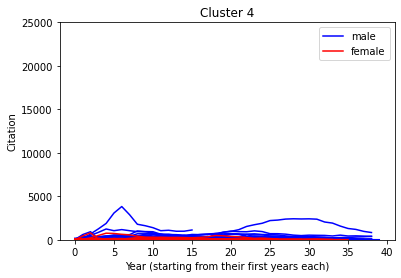

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

popt_list = []
which = 4 # 2, 3, 5, 8
cluster_f, cluster_m = [], []
# for i in range(len(processed_x)):
for i in range(len(X)):
  if (model_labels[i] == which):
    if scholars[i]['gender'] == 'F':
      cluster_f.append(np.array(X[i]))
    elif scholars[i]['gender'] == 'M':
      cluster_m.append(np.array(X[i]))
tmp_cnt1, tmp_cnt2 = 0, 0
for i in range(len(cluster_m)):
  if tmp_cnt1 > 0:
    plt.plot(np.arange(cluster_m[i].shape[0]), cluster_m[i], color='blue')
  else:
    plt.plot(np.arange(cluster_m[i].shape[0]), cluster_m[i], label='male', color='blue')
  tmp_cnt1 += 1
for i in range(len(cluster_f)):
  if tmp_cnt2 > 0:
    plt.plot(np.arange(cluster_f[i].shape[0]), cluster_f[i], color='red')
  else:
    plt.plot(np.arange(cluster_f[i].shape[0]), cluster_f[i], label='female', color='red')
  tmp_cnt2 += 1
plt.ylabel('Citation')
plt.xlabel('Year (starting from their first years each)')
plt.title(f'Cluster {which}')
plt.ylim([0, 25000])
plt.legend()
plt.show()